1.  What is the role of filters and feature maps in Convolutional Neural
Network (CNN)?


a. Filters (Kernels)

A filter is a small matrix of weights (e.g., 3×3, 5×5) that slides across the input image or previous feature map.

Each filter extracts specific local features such as edges, corners, textures, or more complex shapes as the network goes deeper.

The values in the filter are learned automatically during training via backpropagation, so the network discovers the most useful patterns.

Different filters focus on different features: one may detect horizontal edges, another vertical lines, another curves, etc.

Mathematically, the operation is a convolution:

Feature Map =
Input
∗
Filter
+
Bias

b. Feature Maps

A feature map (also called an activation map) is the output of applying a filter to the input.

It highlights where a certain feature (like an edge or shape) is present in the input.

Stacking multiple filters produces multiple feature maps, each capturing a different type of feature.

As we go deeper into the CNN, feature maps capture progressively more abstract patterns:

Early layers → low-level features (edges, colors, textures).

Middle layers → shapes, corners, object parts.

Deep layers → high-level semantic features (e.g., faces, wheels, digits).

2. Explain the concepts of padding and stride in CNNs(Convolutional Neural
Network). How do they affect the output dimensions of feature maps?

In a Convolutional Neural Network (CNN), padding and stride are two key parameters that directly influence the size of the output feature maps. Padding refers to the practice of adding extra rows and columns, usually filled with zeros, around the input image before applying a convolution. Its primary purpose is to control how much of the border information is preserved during convolution and to prevent the feature maps from shrinking too quickly. Without padding (called valid padding), the output becomes smaller than the input after each convolution. With zero padding (often called same padding), enough zeros are added so that the output feature map has the same spatial dimensions as the input when the stride is one.

Stride, on the other hand, determines how many steps the convolutional filter moves across the input. A stride of one means the filter slides one pixel at a time, creating the maximum number of overlapping regions and thus producing a larger output feature map. Increasing the stride reduces overlap, making the output smaller and effectively downsampling the input. The relationship between input size, filter size, padding, and stride can be expressed mathematically as:

Output Size =
𝑊
−
𝐹
+
2
𝑃
𝑆
+
1

where

W is the input dimension,

F is the filter size,

P is the padding, and

S is the stride.

For example, a 7×7 input with a 3×3 filter, stride of 2, and padding of 1 produces a 4×4 output feature map. In summary, padding ensures that edge information is not lost and controls spatial size, while stride regulates the degree of downsampling. Together, they determine the resolution and scale of the feature maps in a CNN.

3. Define receptive field in the context of CNNs. Why is it important for deep
architectures?

In the context of Convolutional Neural Networks (CNNs), the receptive field refers to the specific region of the input image that influences a particular neuron or unit in a feature map. In simpler terms, it is the portion of the input data that a neuron “sees” or is sensitive to. For the first convolutional layer, the receptive field is just the size of the filter (for example, a 3×3 kernel). However, as we move deeper into the network, the receptive field of neurons increases because each layer combines information from multiple neurons of the previous layer. Eventually, deeper neurons capture patterns that span larger areas of the original image.

The receptive field is important in deep architectures because it determines how much contextual information the network can capture. In shallow layers, a small receptive field allows the model to focus on fine-grained local features such as edges, corners, or textures. As the network grows deeper, the receptive field expands, enabling neurons to integrate these local patterns into more complex structures, such as object parts or even entire objects. If the receptive field is too small, the model may fail to capture global context, which is essential for tasks like image classification, object detection, and scene understanding. Conversely, a sufficiently large receptive field ensures that the CNN can effectively recognize both local details and global patterns, making deep architectures powerful for handling complex visual data.

4. Discuss how filter size and stride influence the number of parameters in a CNN.

In a Convolutional Neural Network (CNN), the filter size and stride affect the architecture in different ways, particularly in terms of the number of parameters and the spatial resolution of feature maps.

a. Effect of Filter Size on Parameters

The number of parameters in a convolutional layer depends on the filter size, the depth of the input, and the number of filters. For a filter of size

F×F applied to an input with depth

D, the parameters per filter are:

Parameters per filter =
(
𝐹
×
𝐹
×
𝐷
)
+
1

(The +1 accounts for the bias term.)

Thus, larger filters contain more parameters because each filter must learn more weights. For example, with a

3×3 filter on RGB images (D=3), one filter has (3×3×3)+1= 28

parameters, while a 5×5 filter has
(5×5×3)+1=76 parameters. Importantly, the filter size directly controls model complexity, with larger filters learning broader spatial features but at a higher computational cost.

2. Effect of Stride on Parameters

Unlike filter size, the stride does not change the number of parameters, because parameters depend only on the filter dimensions and input depth. Stride simply controls how far the filter moves across the input. A larger stride reduces the number of positions where the filter is applied, which decreases the number of activations (output size of the feature map) but not the learned weights.

For example, with a stride of 1, a

3×3 filter slides across nearly every pixel, producing a dense feature map. With a stride of 2, the same filter skips every other pixel, producing a smaller feature map. The parameter count remains the same, but the computational cost and memory usage decrease because fewer activations are computed.

Summary

Filter size directly affects the number of parameters: larger filters = more weights to learn.

Stride does not change the number of parameters but influences how many activations are produced, thus impacting computational efficiency and the degree of downsampling.

5. Compare and contrast different CNN-based architectures like LeNet,
AlexNet, and VGG in terms of depth, filter sizes, and performance.

CNN architectures have evolved significantly over time, and LeNet, AlexNet, and VGG are milestones that illustrate this progression. They differ in depth, filter design, and overall performance.

a. LeNet (1990s)

Depth: One of the earliest CNNs, designed by Yann LeCun for digit recognition (MNIST). It had about 5–7 layers including convolutional and fully connected layers.

Filter sizes: Used small filters, typically

5×5. Pooling was average pooling, not max pooling.

Performance: Worked well for small grayscale images (like handwritten digits) but was not designed for large-scale image classification. Its simplicity made it foundational but limited in scalability.

b. AlexNet (2012)

Depth: Much deeper than LeNet, with 8 layers (5 convolutional + 3 fully connected).

Filter sizes: The first convolutional layer used a large

11×11 filter with stride 4, followed by smaller

5×5 and

3×3 filters. Max pooling replaced average pooling.

Performance: Achieved a breakthrough by winning the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) 2012, reducing error rates by nearly 10%. It introduced ReLU activations, dropout for regularization, and parallel training on GPUs.

c. VGG (2014)

Depth: Much deeper, with 16 to 19 layers, showcasing the power of very deep networks.

Filter sizes: Standardized on small

3×3 filters stacked together to effectively simulate larger receptive fields (e.g., two

3×3 filters ≈ one

5×5). Stride and pooling were uniform.

Performance: Achieved high accuracy on ImageNet with a simple and elegant design, proving that depth with uniform filters can greatly improve performance. However, it required massive computation and memory, making it expensive compared to AlexNet.

6. Using keras, build and train a simple CNN model on the MNIST dataset
from scratch. Include code for module creation, compilation, training, and evaluation.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
#Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype("float32") / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype("float32") / 255.0

In [ ]:
# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")   # 10 classes for digits 0–9
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
#Train the model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

Epoch 1/5
844/844 - 41s - 49ms/step - accuracy: 0.9498 - loss: 0.1696 - val_accuracy: 0.9843 - val_loss: 0.0520
Epoch 2/5
844/844 - 40s - 48ms/step - accuracy: 0.9850 - loss: 0.0503 - val_accuracy: 0.9867 - val_loss: 0.0460
Epoch 3/5
844/844 - 41s - 48ms/step - accuracy: 0.9896 - loss: 0.0345 - val_accuracy: 0.9893 - val_loss: 0.0378
Epoch 4/5
844/844 - 40s - 47ms/step - accuracy: 0.9919 - loss: 0.0263 - val_accuracy: 0.9885 - val_loss: 0.0384
Epoch 5/5
844/844 - 39s - 46ms/step - accuracy: 0.9933 - loss: 0.0204 - val_accuracy: 0.9908 - val_loss: 0.0323


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 - 2s - 7ms/step - accuracy: 0.9914 - loss: 0.0267
Test Accuracy: 0.9914


7. Load and preprocess the CIFAR-10 dataset using Keras, and create a
CNN model to classify RGB images. Show your preprocessing and architecture.

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
# Load dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels from integers to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [4]:
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Second convolutional block
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")  # 10 classes
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [6]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

Epoch 1/10
704/704 - 17s - 24ms/step - accuracy: 0.4254 - loss: 1.5723 - val_accuracy: 0.5672 - val_loss: 1.2045
Epoch 2/10
704/704 - 5s - 6ms/step - accuracy: 0.5864 - loss: 1.1633 - val_accuracy: 0.6548 - val_loss: 0.9582
Epoch 3/10
704/704 - 4s - 6ms/step - accuracy: 0.6496 - loss: 0.9918 - val_accuracy: 0.7004 - val_loss: 0.8757
Epoch 4/10
704/704 - 5s - 7ms/step - accuracy: 0.6872 - loss: 0.8835 - val_accuracy: 0.6902 - val_loss: 0.8706
Epoch 5/10
704/704 - 5s - 7ms/step - accuracy: 0.7136 - loss: 0.8109 - val_accuracy: 0.7416 - val_loss: 0.7431
Epoch 6/10
704/704 - 5s - 7ms/step - accuracy: 0.7351 - loss: 0.7494 - val_accuracy: 0.7302 - val_loss: 0.7656
Epoch 7/10
704/704 - 5s - 7ms/step - accuracy: 0.7552 - loss: 0.6935 - val_accuracy: 0.7716 - val_loss: 0.6684
Epoch 8/10
704/704 - 5s - 7ms/step - accuracy: 0.7671 - loss: 0.6573 - val_accuracy: 0.7712 - val_loss: 0.6616
Epoch 9/10
704/704 - 4s - 6ms/step - accuracy: 0.7814 - loss: 0.6178 - val_accuracy: 0.7750 - val_loss: 0.6632

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 - 2s - 6ms/step - accuracy: 0.7670 - loss: 0.6872
Test Accuracy: 0.7670


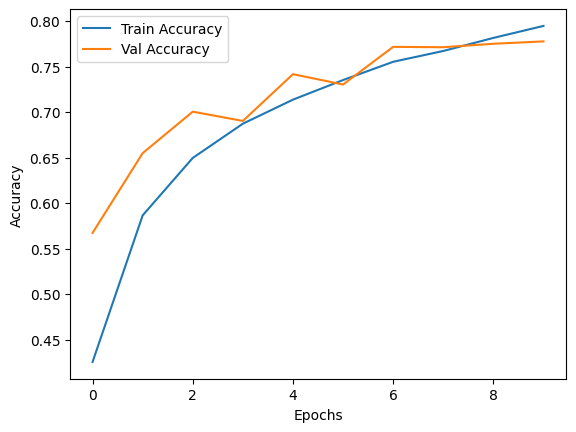

In [8]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

8. Using PyTorch, write a script to define and train a CNN on the MNIST
dataset. Include model definition, data loaders, training loop, and accuracy evaluation.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
#Device configuration

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [3]:
#Data loading and preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),                     # Convert to tensor
    transforms.Normalize((0.1307,), (0.3081,)) # Normalize with MNIST mean & std
])

In [4]:
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 562kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.54MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.51MB/s]


In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)   # (28x28 -> 28x28)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # (28x28 -> 28x28)
        self.pool = nn.MaxPool2d(2, 2)  # Downsampling
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)   # 10 classes for digits

In [6]:
def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))   # (28x28 -> 14x14)
        x = self.pool(F.relu(self.conv2(x)))   # (14x14 -> 7x7)
        x = x.view(-1, 64 * 7 * 7)             # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [7]:
model = CNN().to(device)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [12]:
def train(model, loader, optimizer, criterion, epoch):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(loader):
        data, target = data.to(device), target.to(device)

        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, target)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch}], Loss: {running_loss/len(loader):.4f}")

In [14]:
# Evaluation loop
def test(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

9. Given a custom image dataset stored in a local directory, write code using
Keras ImageDataGenerator to preprocess and train a CNN model.

In [5]:
import os
import numpy as np
from PIL import Image

# Root dataset path
dataset_path = "custom_dataset"
classes = ["cats", "dogs"]

# Create folders (train/val structure)
for split in ["train", "val"]:
    for cls in classes:
        os.makedirs(os.path.join(dataset_path, split, cls), exist_ok=True)

# Generate random images (50 train, 10 val per class)
for cls in classes:
    for i in range(50):
        arr = np.random.randint(0, 255, (64, 64, 3), dtype=np.uint8)  # random RGB image
        img = Image.fromarray(arr)
        img.save(os.path.join(dataset_path, "train", cls, f"{cls}_{i}.jpg"))
    for i in range(10):
        arr = np.random.randint(0, 255, (64, 64, 3), dtype=np.uint8)
        img = Image.fromarray(arr)
        img.save(os.path.join(dataset_path, "val", cls, f"{cls}_{i}.jpg"))

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Paths
train_dir = "custom_dataset/train"
val_dir   = "custom_dataset/val"

# ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,          # normalize
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Flow from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='binary'  # since 2 classes
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='binary'
)

Found 100 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [8]:
# CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 478ms/step - accuracy: 0.4912 - loss: 0.7345 - val_accuracy: 0.5000 - val_loss: 0.7011
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5268 - loss: 0.7174 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5694 - loss: 0.6910 - val_accuracy: 0.5000 - val_loss: 0.6950
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5386 - loss: 0.6929 - val_accuracy: 0.4000 - val_loss: 0.6941
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4739 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6934


In [11]:
# Evaluate
loss, acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {acc:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5208 - loss: 0.6924
Validation Accuracy: 0.5000


10. You are working on a web application for a medical imaging startup. Your
task is to build and deploy a CNN model that classifies chest X-ray images into “Normal” and “Pneumonia” categories. Describe your end-to-end approach–from data preparation and model training to deploying the model as a web app using Streamlit.


a. Data & ethics

Source & labeling: collect curated chest X-ray images (DICOM or PNG/JPEG) with reliable labels (radiologist consensus). Keep provenance and versioning.

Privacy & compliance: de-identify images (remove metadata), follow HIPAA / GDPR as applicable. Use secure storage (encrypted S3 buckets or private storage).

Bias & dataset balance: check class balance, patient overlap (no patient in both train/val/test), age/sex distribution. If limited positive cases, use augmentation carefully.

Train/val/test split: split by patient ID (e.g., 70/15/15) to avoid leakage.

b. Preprocessing & augmentation

Input resolution: 224×224 or 320×320 (tradeoff: GPU cost vs info).

Windowing: If using DICOM, apply consistent window/level; normalize intensities.

Channel: replicate grayscale to 3 channels if using ImageNet backbones.

Augmentation: realistic transforms only — small rotations (±10°), translations, horizontal flip (use clinically appropriate flips), brightness/contrast, random zoom. Avoid unrealistic distortions.

Class imbalance: use class weights, oversampling, or focal loss.

Example preprocessing pipeline (Keras ImageDataGenerator or tf.data recommended for speed). I’ll use tf.keras.preprocessing.image_dataset_from_directory + tf.image ops below.

c. Model: transfer learning

Use a robust backbone (DenseNet121, EfficientNetB0/B1, or ResNet50). Freeze backbone initially, train top classifier, then unfreeze some layers for fine-tuning.
d. Evaluation & validation

Compute confusion matrix, sensitivity (recall for Pneumonia), specificity, AUC-ROC, PR curve.

Use patient-level evaluation (aggregate predictions per patient).

Cross-validation across different institutions if possible.

Calibration: apply Platt scaling or isotonic calibration if probabilities are used clinically.

External validation: test on an external dataset from another hospital.

e. Explainability — Grad-CAM (recommended)

Provide heatmaps (Grad-CAM) to highlight regions that influenced the prediction so clinicians can inspect model focus.

Brief sketch of Grad-CAM usage in Keras (used in Streamlit app later).

f. Packaging for deployment

Save the Keras model (model.save('models/chest_xray_densenet.h5')) or convert to TF SavedModel or TensorFlow Lite/ONNX if needed.

Containerize with Docker. Include GPU image if inference requires GPU.

g. Deployment options

Streamlit Cloud (quick): push repo, set model file to remote storage or include model (large models better in S3).

Docker + Kubernetes / EKS / GCP Cloud Run: for scale and managed infra. Use GPU nodes if low latency and heavy load.

Serve model separately (recommended for production): deploy model behind a REST API (FastAPI or TensorFlow Serving), and have Streamlit call that API. This separates concerns and scales inference independently.

Example architecture:

Storage (S3) for images + model artifacts

Model server (TF Serving or FastAPI) behind load balancer

Streamlit or React frontend calling model server

Database for logs and audit (Postgres), monitoring stack (Prometheus/Grafana)

h. Testing, monitoring & governance

Unit & integration tests: image preprocessing, model outputs, API endpoints.

Monitoring: track input distribution, latency, prediction distribution, model drift. Alert if sensitivity drops.

Auditing & logging: log predictions, timestamps, patient hash (not PII), model version.

Retraining: data pipeline to collect labeled feedback, schedule periodic retraining, and use Canary/A-B for new models.

Clinical validation & approval: for any clinical deployment, conduct prospective trials and obtain regulatory approvals (FDA, CE) — this is essential.